### Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований.

Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи,

например, анализа настроений или распознавания именованных сущностей.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # для преобразования текста в вектор
from sklearn.linear_model import LogisticRegression # использование модели логистической регрессии
from sklearn.metrics import accuracy_score, classification_report # оценка производительности модели
from sklearn.pipeline import Pipeline # конвеер обработки данных


In [15]:
df=pd.read_csv('footbal_stat.csv')
df

,Country,League,Club,Player Names,Mins,Goals,xG,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,1849,11,6.62,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,3129,16,11.86,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,2940,28,23.21,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,2842,13,14.06,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,1745,13,10.65,1.25,2016
...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,2155,10,7.49,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,1573,12,9.77,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,2363,7,5.72,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,2461,15,14.51,1.66,2020


In [16]:
df[df['Goals']>= 30]

,Country,League,Club,Player Names,Mins,Goals,xG,On Target Per Avg Match,Year
12,Spain,La Liga,(BAR),Lionel Messi,2910,37,26.65,2.48,2016
46,Germany,Bundesliga,(BAY),Robert Lewandowski,2871,30,30.52,2.85,2016
54,Germany,Bundesliga,(ARS),Pierre-Emerick Aubameyang,2894,31,28.94,2.56,2016
107,Spain,La Liga,(BAR),Lionel Messi,3123,33,32.54,2.89,2017
195,Spain,La Liga,(BAR),Lionel Messi,2849,36,25.49,2.90,2018
251,France,France Ligue 1,(PSG),Kylian Mbappe-Lottin,2488,33,31.17,2.67,2018
302,USA,MLS,(ACM),Zlatan Ibrahimovic,2998,31,22.72,2.12,2019
317,USA,MLS,(LAF),Carlos Vela,3128,36,25.35,2.28,2019
385,Italy,Serie A,(JUV),Cristiano Ronaldo,3127,31,27.32,2.40,2019
391,Italy,Serie A,(LAZ),Ciro Immobile,3371,36,26.61,2.00,2019


### Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [17]:
# Определение функции для присвоения метки на основе числового порога

def best_player(value):
    if value > 25:
        return 'great_season'
    elif value >=15 and value >=25:
        return 'good_season'
    else:
        return 'bad_season'
    


In [18]:
# Добавления нового столбца # Применение функции к столбцу данных

df['game rating by season']=df['Goals'].apply(best_player)
df.sample(2)


,Country,League,Club,Player Names,Mins,Goals,xG,On Target Per Avg Match,Year,game rating by season
356,Portugal,Primeira Liga,(FER),Douglas Tanque,2054,11,7.57,1.11,2019,bad_season
621,Brazil,Campeonato Brasileiro SÃ©rie A,(CEA),Vinicius,1348,7,5.25,1.69,2020,bad_season


In [19]:
df[df['Goals']>30]

,Country,League,Club,Player Names,Mins,Goals,xG,On Target Per Avg Match,Year,game rating by season
12,Spain,La Liga,(BAR),Lionel Messi,2910,37,26.65,2.48,2016,great_season
54,Germany,Bundesliga,(ARS),Pierre-Emerick Aubameyang,2894,31,28.94,2.56,2016,great_season
107,Spain,La Liga,(BAR),Lionel Messi,3123,33,32.54,2.89,2017,great_season
195,Spain,La Liga,(BAR),Lionel Messi,2849,36,25.49,2.90,2018,great_season
251,France,France Ligue 1,(PSG),Kylian Mbappe-Lottin,2488,33,31.17,2.67,2018,great_season
302,USA,MLS,(ACM),Zlatan Ibrahimovic,2998,31,22.72,2.12,2019,great_season
317,USA,MLS,(LAF),Carlos Vela,3128,36,25.35,2.28,2019,great_season
385,Italy,Serie A,(JUV),Cristiano Ronaldo,3127,31,27.32,2.40,2019,great_season
391,Italy,Serie A,(LAZ),Ciro Immobile,3371,36,26.61,2.00,2019,great_season
408,Germany,Bundesliga,(BAY),Robert Lewandowski,2783,34,31.05,2.29,2019,great_season


<Axes: >

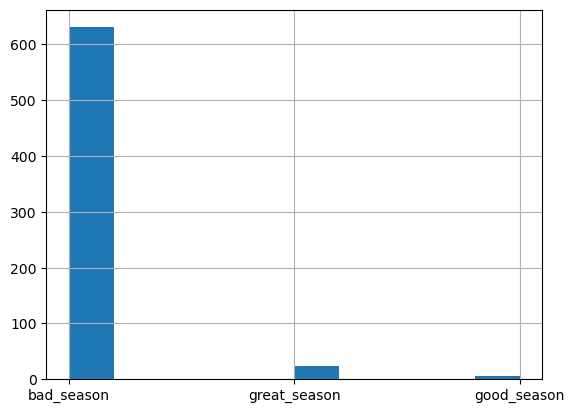

In [20]:
df['game rating by season'].hist() 

### Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.


In [23]:
subset=df.sample(frac=0.03)

In [24]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 191 to 595
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  20 non-null     object 
 1   League                   20 non-null     object 
 2   Club                     20 non-null     object 
 3   Player Names             20 non-null     object 
 4   Mins                     20 non-null     int64  
 5   Goals                    20 non-null     int64  
 6   xG                       20 non-null     float64
 7   On Target Per Avg Match  20 non-null     float64
 8   Year                     20 non-null     int64  
 9   game rating by season    20 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ KB


In [25]:
subset.to_csv('subset_1.csv',index=False)

In [26]:
df_manual = pd.read_csv('project-.csv')

### Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.


In [53]:
df_manual = pd.read_csv('project-.csv')

df_rule_based = pd.read_csv('footbal_stat.csv')


df_combined =pd.concat([df_manual,df_rule_based], ignore_index=True)

In [54]:
df_combined

,Club,Country,Goals,League,Mins,On Target Per Avg Match,Player Names,Year,annotation_id,annotator,created_at,game rating by season,id,lead_time,sentiment,updated_at,xG
0,(PSG),Spain,13,La Liga,2877,1.02,Pablo Sarabia,2018,1.0,1.0,2024-04-06T16:56:46.684374Z,bad_season,21.0,24.594,great,2024-04-06T16:56:46.684374Z,11.81
1,(SAP),Brazil,9,Campeonato Brasileiro SÃ©rie A,1222,1.79,Hernanes,2017,2.0,1.0,2024-04-06T16:57:10.901150Z,bad_season,22.0,6.112,average,2024-04-06T16:57:10.901150Z,5.27
2,(NEW),England,14,Premier League,2714,1.02,Callum Wilson,2018,3.0,1.0,2024-04-06T16:57:21.661569Z,bad_season,23.0,10.461,average,2024-04-06T16:57:21.661569Z,14.57
3,(STP),Germany,11,Bundesliga,2447,0.97,Guido Burgstaller,2017,19.0,1.0,2024-04-06T17:02:30.876082Z,bad_season,24.0,7.230,average,2024-04-06T17:02:35.527780Z,8.24
4,(LYO),Brazil,10,Campeonato Brasileiro SÃ©rie A,2962,1.28,Lucas Paqueta,2018,18.0,1.0,2024-04-06T17:02:15.216761Z,bad_season,25.0,4.459,average,2024-04-06T17:02:17.231512Z,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,(UTR),Netherlands,10,Eredivisie,2155,0.79,Gyrano Kerk,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49
676,(AJA),Netherlands,12,Eredivisie,1573,1.81,Quincy Promes,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.77
677,(PSV),Netherlands,7,Eredivisie,2363,0.56,Denzel Dumfries,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.72
678,NaN,Netherlands,15,Eredivisie,2461,1.66,Cyriel Dessers,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.51


In [56]:
average_mode = df_combined['game rating by season'].mode()[0]
df_combined['game rating by season']=df_combined['game rating by season'].fillna(average_mode)

df_combined

,Club,Country,Goals,League,Mins,On Target Per Avg Match,Player Names,Year,annotation_id,annotator,created_at,game rating by season,id,lead_time,sentiment,updated_at,xG
0,(PSG),Spain,13,La Liga,2877,1.02,Pablo Sarabia,2018,1.0,1.0,2024-04-06T16:56:46.684374Z,bad_season,21.0,24.594,great,2024-04-06T16:56:46.684374Z,11.81
1,(SAP),Brazil,9,Campeonato Brasileiro SÃ©rie A,1222,1.79,Hernanes,2017,2.0,1.0,2024-04-06T16:57:10.901150Z,bad_season,22.0,6.112,average,2024-04-06T16:57:10.901150Z,5.27
2,(NEW),England,14,Premier League,2714,1.02,Callum Wilson,2018,3.0,1.0,2024-04-06T16:57:21.661569Z,bad_season,23.0,10.461,average,2024-04-06T16:57:21.661569Z,14.57
3,(STP),Germany,11,Bundesliga,2447,0.97,Guido Burgstaller,2017,19.0,1.0,2024-04-06T17:02:30.876082Z,bad_season,24.0,7.230,average,2024-04-06T17:02:35.527780Z,8.24
4,(LYO),Brazil,10,Campeonato Brasileiro SÃ©rie A,2962,1.28,Lucas Paqueta,2018,18.0,1.0,2024-04-06T17:02:15.216761Z,bad_season,25.0,4.459,average,2024-04-06T17:02:17.231512Z,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,(UTR),Netherlands,10,Eredivisie,2155,0.79,Gyrano Kerk,2020,NaN,NaN,NaN,bad_season,NaN,NaN,NaN,NaN,7.49
676,(AJA),Netherlands,12,Eredivisie,1573,1.81,Quincy Promes,2020,NaN,NaN,NaN,bad_season,NaN,NaN,NaN,NaN,9.77
677,(PSV),Netherlands,7,Eredivisie,2363,0.56,Denzel Dumfries,2020,NaN,NaN,NaN,bad_season,NaN,NaN,NaN,NaN,5.72
678,NaN,Netherlands,15,Eredivisie,2461,1.66,Cyriel Dessers,2020,NaN,NaN,NaN,bad_season,NaN,NaN,NaN,NaN,14.51


### Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(df_combined['game rating by season'],df_combined['Goals'],test_size=0.2,random_state=42)

In [61]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

In [62]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

### Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [63]:
prediction = pipeline.predict(X_test)

In [68]:
accuracy = accuracy_score(Y_test,prediction)
accuracy

0.10294117647058823

In [71]:
report = classification_report(Y_test,prediction)


c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
